In [2]:

import sys
import os
sys.path.append('../')
from Codes.model import *
from Codes.utils import *
plt.style.use('default')

from tqdm import tqdm
import pickle
RESULT_DIR = "../../ExptsEval"

from timeit import default_timer
from sklearn.datasets import make_blobs




## Plots with Norm Dataset

In [3]:
# function to extract the results from MinMax clustering 

def extractData2(K,D,N_list ):

    # df_ARI = pd.DataFrame(N_list, columns=['N'])
    df_time = pd.DataFrame(N_list, columns=['N'])
    df_constr = pd.DataFrame(N_list, columns=['N'])
    df_optgap = pd.DataFrame(N_list, columns=['N'])



    cols = ['clsvr_cg']
    
    for i, model in enumerate(['clsvr']):
        with open(os.path.join(RESULT_DIR, 'Syn1_'+str(K)+str(D)+'_' + str(model)+'.pkl'), 'rb') as inp:

            metrics_list = pickle.load(inp)
            time_list = pickle.load(inp)
            constrsCnt_list = pickle.load(inp)
            optgap_list = pickle.load(inp)
            optVal_list = pickle.load(inp)
            weights_list = pickle.load(inp)
            bias_list = pickle.load(inp)

        df_time[cols[i]] = time_list
        df_constr[cols[i]] = constrsCnt_list
        df_optgap[cols[i]] = optgap_list


    return df_time, df_constr,df_optgap


In [4]:
col = [
    'tab:green',
    'tab:blue',
'tab:orange',
'tab:red',
'tab:purple',
'tab:brown',
'tab:pink',
'tab:gray',
'tab:olive',
'tab:cyan',
'tab:green',
'tab:blue',
'tab:orange',
'tab:red',
'tab:purple',
'tab:brown',
'tab:pink',
'tab:gray',
'tab:olive',
'tab:cyan']


markers = ["D", "v", "<", "o",  "^", "s",">","o","D", "v", "<", "o",  "^", "s",">","o"]

In [4]:
plt.style.use('default')


## Performance of clsvr_cg plot

In [6]:
N_list = [1000, 3150, 10000, 31500, 100000]



In [7]:
style = ['-.','-.','--','--','-','-','-','-']

100%|██████████| 8/8 [00:00<00:00, 92.94it/s]


2 5
2 8
3 1
3 2
5 1
5 2
5 5
5 8


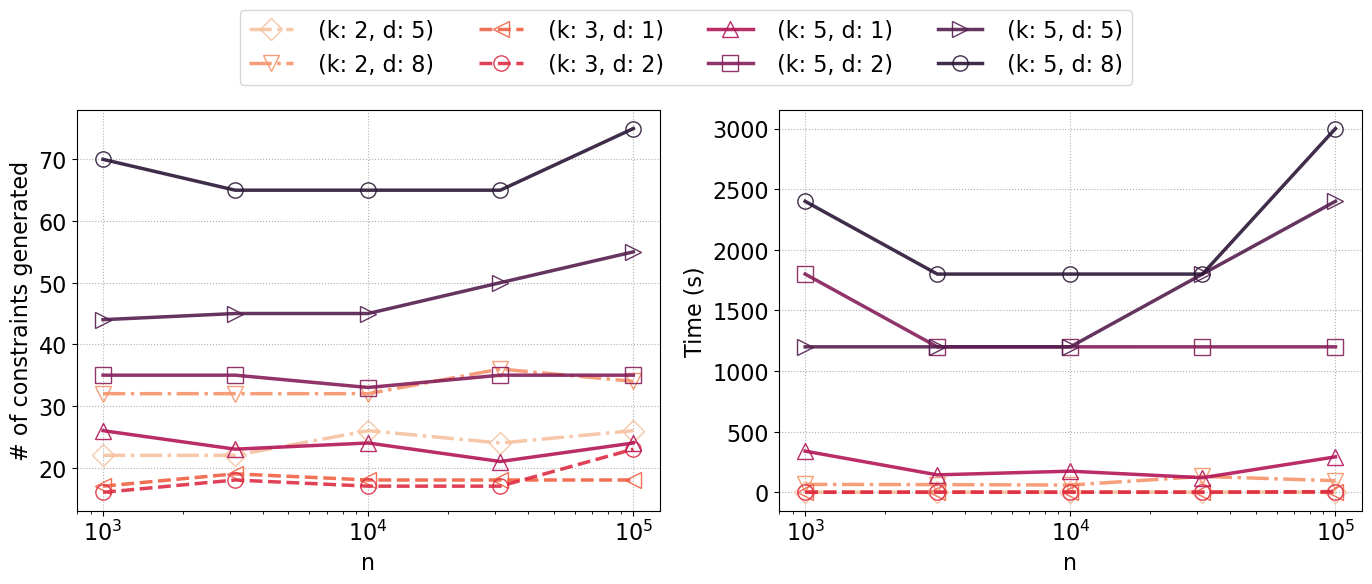

In [9]:
plt.rcParams.update({'font.size': 16})
K_list = [2,2, 3, 3 ,5 , 5,5,5 ]
D_list = [5, 8, 1, 2, 1, 2, 5, 8] 
cmap = sns.color_palette("rocket_r", n_colors=8)

fig, ax = plt.subplots(1, 2, figsize = (14,6), sharey = False, sharex=True)


for i, D in enumerate(tqdm(D_list)):
    
    K = K_list[i]
    print(K,D)
    df_time,df_constr,df_optgap = extractData2(K,D,N_list )

    df_constr.plot(x = 'N', y = 'clsvr_cg', marker = markers[i], fillstyle = 'none', color=cmap[i], ax = ax[0], markersize = 11, alpha = 0.9, linewidth = 2.5,legend = False, style=style[i])
    df_time.plot(x = 'N', y = 'clsvr_cg', marker = markers[i], fillstyle = 'none', color=cmap[i], ax = ax[1], markersize = 11, alpha = 0.9, linewidth = 2.5,legend = False, style=style[i])


ax[0].set_ylabel('# of constraints generated')
ax[1].set_ylabel('Time (s)')

ax[0].set_xlabel('n')
ax[1].set_xlabel('n')


ax[0].grid(True,linestyle = ':')
ax[1].grid(True,linestyle = ':')

ax[0].set_xscale("log")
ax[1].set_xscale("log")
# fig.legend([' (k: 2, d: 1)',' (k: 2, d: 2)',' (k: 2, d: 5)',' (k: 2, d: 8)',' (k: 3, d: 1)',' (k: 3, d: 2)',' (k: 5, d: 1)',' (k: 5, d: 2)'],loc = 'upper center',ncol=4,fontsize = 16)#,bbox_to_anchor=[0.38, 0.57])
fig.legend([' (k: 2, d: 5)',' (k: 2, d: 8)',' (k: 3, d: 1)',' (k: 3, d: 2)',' (k: 5, d: 1)',' (k: 5, d: 2)',' (k: 5, d: 5)',' (k: 5, d: 8)'],loc = 'upper center',ncol=4,fontsize = 16)#,bbox_to_anchor=[0.38, 0.57])
plt.title("\n\n")

fig.tight_layout(h_pad = 3)


plt.savefig(f'{RESULT_DIR}/Synthetic1_FF.pdf', bbox_inches = 'tight')
plt.show()